In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
f = open('./data/WhatsApp Chat with Hetavi Shah DEPSTAR CSE.txt', encoding='utf-8')

In [3]:
data = f.read()
print(data)

08/07/2024, 10:17 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
14/07/2024, 17:30 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
23/10/2024, 17:10 - Krishil Agrawal: Hi There
23/10/2024, 17:10 - Krishil Agrawal: Krishil this side
23/10/2024, 17:20 - Hetavi Shah DEPSTAR CSE: Hii
23/10/2024, 17:21 - Krishil Agrawal: Are you interested to take part in hackathon ??
23/10/2024, 17:21 - Hetavi Shah DEPSTAR CSE: Yes
23/10/2024, 17:22 - Hetavi Shah DEPSTAR CSE: My friend is also interested
23/10/2024, 17:22 - Krishil Agrawal: Ohk
23/10/2024, 17:23 - Krishil Agrawal: Is she from our class
23/10/2024, 17:23 - Krishil Agrawal: ??
23/10/2024, 17:23 - Hetavi Shah DEPSTAR CSE: Yes Dharini
23/10/2024, 17:23 - Krishil Agrawal: Ohk
23/10/2024, 17:23 - Krishil Agrawal: I have also msg her
23/10/2024, 17:23 - Krishil Agrawal: But she did not responded
23/10/20

In [4]:
# Common WhatsApp patterns - try these one by one to see which works for your format
pattern1 = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'  # DD/MM/YY, HH:MM - 
pattern2 = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[AP]M\s-\s'  # with AM/PM
pattern3 = r'\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s[AP]M\]\s'  # [DD/MM/YY, HH:MM:SS AM/PM] 

# Let's test which pattern works with your data
print("Testing pattern1:", bool(re.search(pattern1, data)))
print("Testing pattern2:", bool(re.search(pattern2, data)))
print("Testing pattern3:", bool(re.search(pattern3, data)))

# Use the first pattern for now
pattern = pattern1

Testing pattern1: True
Testing pattern2: False
Testing pattern3: False


In [5]:
messages = re.split(pattern, data)
print(f"Total messages found: {len(messages)}")
print("First few messages:")
for i, msg in enumerate(messages[:5]):
    print(f"Message {i}: {repr(msg[:100])}...")  # Show first 100 chars

Total messages found: 912
First few messages:
Message 0: ''...
Message 1: 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share '...
Message 2: 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share '...
Message 3: 'Krishil Agrawal: Hi There\n'...
Message 4: 'Krishil Agrawal: Krishil this side\n'...


In [6]:
# Extract dates using findall to get all timestamps
dates = re.findall(pattern, data)
print(f"Total dates found: {len(dates)}")
print("First few dates:")
for i, date in enumerate(dates[:5]):
    print(f"Date {i}: {date}")

# Clean up messages (remove empty first element if exists)
if messages and not messages[0].strip():
    messages = messages[1:]

print(f"\nAfter cleanup - Messages: {len(messages)}, Dates: {len(dates)}")

Total dates found: 911
First few dates:
Date 0: 08/07/2024, 10:17 - 
Date 1: 14/07/2024, 17:30 - 
Date 2: 23/10/2024, 17:10 - 
Date 3: 23/10/2024, 17:10 - 
Date 4: 23/10/2024, 17:20 - 

After cleanup - Messages: 911, Dates: 911


In [7]:
str1 = '08/07/2024, 10:17 - '
str1.split('-')[0]

'08/07/2024, 10:17 '

In [8]:
dates = [str.split('-')[0] for str in dates]
# dates[0]

In [9]:
df = pd.DataFrame({'message_date': dates, 'user_message': messages})
df

,message_date,user_message
0,"08/07/2024, 10:17",Messages and calls are end-to-end encrypted. O...
1,"14/07/2024, 17:30",Messages and calls are end-to-end encrypted. O...
2,"23/10/2024, 17:10",Krishil Agrawal: Hi There\n
3,"23/10/2024, 17:10",Krishil Agrawal: Krishil this side\n
4,"23/10/2024, 17:20",Hetavi Shah DEPSTAR CSE: Hii\n
...,...,...
906,"21/08/2025, 22:56",Krishil Agrawal: are ha 😂\n
907,"21/08/2025, 22:56",Krishil Agrawal: Why are you taking it upon yo...
908,"21/08/2025, 22:56",Krishil Agrawal: i was saying that sir e khotu...
909,"21/08/2025, 22:57",Hetavi Shah DEPSTAR CSE: <Media omitted>\n


In [10]:
# Strip whitespace from date strings before converting
df['message_date'] = df['message_date'].str.strip()
df['message_date'] = pd.to_datetime(df['message_date'], format="%d/%m/%Y, %H:%M")

df.rename(columns={'message_date': 'date'}, inplace=True)
df

,date,user_message
0,2024-07-08 10:17:00,Messages and calls are end-to-end encrypted. O...
1,2024-07-14 17:30:00,Messages and calls are end-to-end encrypted. O...
2,2024-10-23 17:10:00,Krishil Agrawal: Hi There\n
3,2024-10-23 17:10:00,Krishil Agrawal: Krishil this side\n
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE: Hii\n
...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal: are ha 😂\n
907,2025-08-21 22:56:00,Krishil Agrawal: Why are you taking it upon yo...
908,2025-08-21 22:56:00,Krishil Agrawal: i was saying that sir e khotu...
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE: <Media omitted>\n


In [11]:
df.shape

(911, 2)

In [12]:
x = 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.'
df = df[~df['user_message'].str.contains(x, na=False)]
df

,date,user_message
2,2024-10-23 17:10:00,Krishil Agrawal: Hi There\n
3,2024-10-23 17:10:00,Krishil Agrawal: Krishil this side\n
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE: Hii\n
5,2024-10-23 17:21:00,Krishil Agrawal: Are you interested to take pa...
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE: Yes\n
...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal: are ha 😂\n
907,2025-08-21 22:56:00,Krishil Agrawal: Why are you taking it upon yo...
908,2025-08-21 22:56:00,Krishil Agrawal: i was saying that sir e khotu...
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE: <Media omitted>\n


In [13]:
users = []
messages = []
group_notifications = []

for i in df['user_message']:
  users.append(i.split(':')[0])
  messages.append(i.split(':')[1])
  if i.split(':') == '':
    messages.append(i)

df['users'] = users
df['messages'] = messages
df.drop('user_message', axis=1, inplace=True)
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1587138418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['users'] = users
C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1587138418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['messages'] = messages
C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1587138418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

,date,users,messages
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n
...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n


In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1287804412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1287804412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month_name()
C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1287804412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,date,users,messages,year,month,day,hour,minute
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21
...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57


In [15]:
words = []

for message in df['messages']:
  words.extend(message.split())

In [16]:
len(words)

5714

In [17]:
df[df['messages'].str.contains('Media omitted')]
df[df['messages'].str.contains('<Media omitted>\n')]

,date,users,messages,year,month,day,hour,minute
59,2024-10-23 20:28:00,Krishil Agrawal,<Media omitted>\n,2024,October,23,20,28
110,2025-01-05 18:50:00,Krishil Agrawal,<Media omitted>\n,2025,January,5,18,50
114,2025-01-05 22:52:00,Krishil Agrawal,<Media omitted>\n,2025,January,5,22,52
115,2025-01-05 22:52:00,Krishil Agrawal,<Media omitted>\n,2025,January,5,22,52
205,2025-01-08 21:03:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,January,8,21,3
...,...,...,...,...,...,...,...,...
856,2025-08-21 17:35:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,17,35
857,2025-08-21 17:35:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,17,35
880,2025-08-21 22:31:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,31
881,2025-08-21 22:31:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,31


In [18]:
# !pip install urlextract

In [19]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls('Hi there have you seen www.youtube.com')
urls

['www.youtube.com']

In [20]:
y = []

for message in df['messages'].to_string():
  y.extend(extractor.find_urls(message))

len(y)

0

In [21]:
max1 = df['users'].value_counts().values
max(max1)

np.int64(510)

In [22]:
x = df['users'].value_counts().head()

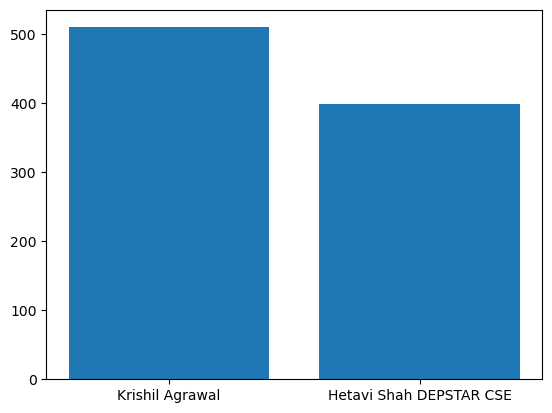

In [23]:
import matplotlib.pyplot as plt

name = x.index.to_numpy()
count = np.array(x.values)  # Ensure count is a numpy array

plt.bar(name, count)
plt.xticks()
plt.show()

In [24]:
round(df['users'].value_counts().head()/df.shape[0]*100, 2).reset_index().rename(columns={'index': 'Name', 'users': 'Percent'})

,Percent,count
0,Krishil Agrawal,56.11
1,Hetavi Shah DEPSTAR CSE,43.89


In [25]:
temp = df[df['messages'] != 'group_notification']
temp

,date,users,messages,year,month,day,hour,minute
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21
...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57


In [26]:
temp = temp[~temp['messages'].str.contains('<Media omitted>\n')]
temp

,date,users,messages,year,month,day,hour,minute
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21
...,...,...,...,...,...,...,...,...
905,2025-08-21 22:55:00,Hetavi Shah DEPSTAR CSE,Sir aa je lakhayo che ej che ma jate nathi la...,2025,August,21,22,55
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56


In [27]:
f = open('./stop_hinglish.txt', 'r')
stopwords = f.read()
stopwords

".\n..\n...\n?\n-\n--\n1\n2\n3\n4\n5\n6\n7\n8\n9\n0\na\naadi\naaj\naap\naapne\naata\naati\naaya\naaye\nab\nabbe\nabbey\nabe\nabhi\nable\nabout\nabove\naccha\naccording\naccordingly\nacha\nachcha\nacross\nactually\nafter\nafterwards\nagain\nagainst\nagar\nain\naint\nain't\naisa\naise\naisi\nalag\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nandar\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\nap\napan\napart\napna\napnaa\napne\napni\nappear\nare\naren\narent\naren't\naround\narre\nas\naside\nask\nasking\nat\naur\navum\naya\naye\nbaad\nbaar\nbad\nbahut\nbana\nbanae\nbanai\nbanao\nbanaya\nbanaye\nbanayi\nbanda\nbande\nbandi\nbane\nbani\nbas\nbata\nbatao\nbc\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nbhai\nbheetar\nbhi\nbhitar\nbht\nbilkul\nbohot\nbol\nbola\nbole\nboli\nbolo\nbolta\nbolte\nbolti\nboth\

In [28]:
words = []

for message in temp['messages']:
    for word in message.split():
        if word not in stopwords:
            words.append(word)

In [29]:
words

['Hi',
 'There',
 'Krishil',
 'Hii',
 'Are',
 'interested',
 'hackathon',
 '??',
 'Yes',
 'My',
 'friend',
 'interested',
 'Ohk',
 'Is',
 'class',
 '??',
 'Yes',
 'Dharini',
 'Ohk',
 'I',
 'msg',
 'But',
 'responded',
 'Okay',
 'confirmation',
 'Ohk',
 'Can',
 'type',
 'skills',
 'So',
 'I',
 'field',
 'expert',
 'I',
 'frontend',
 'I',
 'familiar',
 'development',
 'ohk',
 'hackathon',
 'Ahmedabad',
 'javanu',
 'thase',
 'comfortable',
 '??',
 'Can',
 'plz',
 'confirmation',
 'yess',
 'pls',
 'asap',
 'bcoz',
 'registration',
 'Ya',
 'On',
 'date',
 'hackathon',
 'That',
 'Ok',
 'It',
 'Dec',
 'Actually',
 'Amna',
 'member',
 'thai',
 'Gaya',
 'Ok',
 'Have',
 'decided',
 'project',
 'We',
 'build',
 'project',
 'There',
 '10',
 '15',
 'questions',
 'And',
 'solve',
 'Means',
 'development',
 'related',
 'nathi',
 'hackathon',
 'Okay',
 'Means',
 'life',
 'problem',
 'hase',
 'Smt',
 'DSA',
 'type',
 'Ok',
 'So',
 'Let',
 'talk',
 'friend',
 'picking',
 'call',
 'today',
 'Ohk',
 'np',

In [30]:
words = []

for message in temp['messages']:
    words.extend(message.split())

In [31]:
from collections import Counter

word_freq = Counter(words).most_common(20)
word_freq

[('che', 100),
 ('u', 82),
 ('to', 69),
 ('?', 64),
 ('the', 58),
 ('have', 57),
 ('was', 56),
 ('ma', 54),
 ('in', 48),
 ('is', 48),
 ('I', 48),
 ('i', 46),
 ('Yes', 42),
 ('message', 40),
 ('not', 39),
 ('sir', 39),
 ('will', 38),
 ('for', 36),
 ('but', 36),
 ('that', 35)]

In [32]:
df['month_num'] = df['date'].dt.month
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\4282082883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_num'] = df['date'].dt.month


,date,users,messages,year,month,day,hour,minute,month_num
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10,10
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10,10
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20,10
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21,10
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21,10
...,...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56,8
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56,8
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56,8
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57,8


In [33]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['messages'].reset_index()
timeline

,year,month_num,month,messages
0,2024,10,October,72
1,2024,11,November,23
2,2025,1,January,196
3,2025,2,February,264
4,2025,3,March,47
5,2025,5,May,6
6,2025,7,July,195
7,2025,8,August,106


In [ ]:
# timeline['time'] = timeline['month'] + "-" + timeline['year'].astype(str)

time = []

for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [38]:
timeline['time'] = time

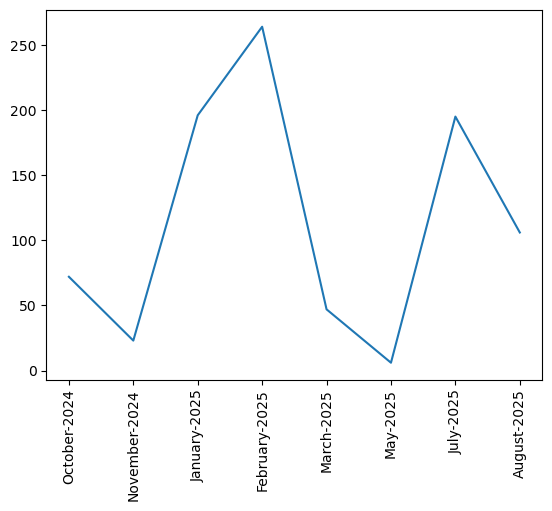

In [39]:
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation=90)
plt.show()

In [41]:
df['only_date'] = df['date'].dt.date
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1424401535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['only_date'] = df['date'].dt.date


,date,users,messages,year,month,day,hour,minute,month_num,only_date
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10,10,2024-10-23
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10,10,2024-10-23
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20,10,2024-10-23
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21,10,2024-10-23
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21,10,2024-10-23
...,...,...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56,8,2025-08-21
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56,8,2025-08-21
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56,8,2025-08-21
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57,8,2025-08-21


In [44]:
daily_timeline = df.groupby(['only_date']).count()['messages'].reset_index()
daily_timeline

,only_date,messages
0,2024-10-23,69
1,2024-10-24,3
2,2024-11-10,23
3,2025-01-05,33
4,2025-01-07,72
5,2025-01-08,38
6,2025-01-10,19
7,2025-01-14,2
8,2025-01-21,32
9,2025-02-02,38


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '2024-10-23'),
  Text(1, 0, '2024-10-24'),
  Text(2, 0, '2024-11-10'),
  Text(3, 0, '2025-01-05'),
  Text(4, 0, '2025-01-07'),
  Text(5, 0, '2025-01-08'),
  Text(6, 0, '2025-01-10'),
  Text(7, 0, '2025-01-14'),
  Text(8, 0, '2025-01-21'),
  Text(9, 0, '2025-02-02'),
  Text(10, 0, '2025-02-04'),
  Text(11, 0, '2025-02-07'),
  Text(12, 0, '2025-02-09'),
  Text(13, 0, '2025-02-12'),
  Text(14, 0, '2025-02-13'),
  Text(15, 0, '2025-02-22'),
  Text(16, 0, '2025-02-25'),
  Text(17, 0, '2025-02-26'),
  Text(18, 0, '2025-03-05'),
  Text(19, 0, '2025-03-06'),
  Text(20, 0, '2025-03-07'),
  Text(21, 0, '2025-03-25'),
  Text(22, 0, '2025-03-27'),
  Text(23, 0, '2025-05-03'),
  Text(24, 0, '2025-07-18'),
  Text(25, 0, '2025-07-26'),
  Text(26, 0, '2025-07-27'),
  Text(27, 0, '2025-07-30'),
  Text(28, 0, '

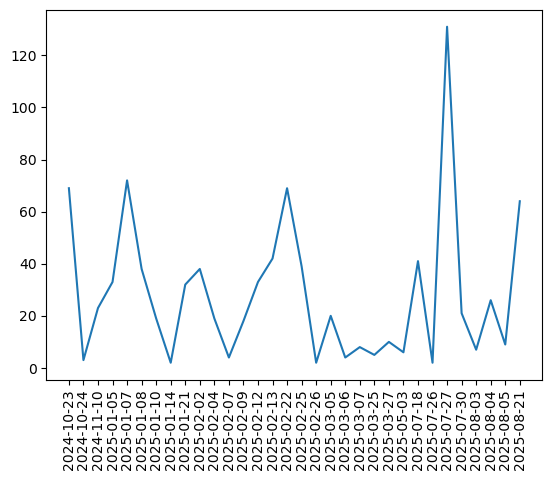

In [49]:
plt.plot(daily_timeline['only_date'].astype(str), daily_timeline['messages'])
plt.xticks(rotation=90)

In [50]:
df['day_name'] = df['date'].dt.day_name()
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\704248850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name'] = df['date'].dt.day_name()


,date,users,messages,year,month,day,hour,minute,month_num,only_date,day_name
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10,10,2024-10-23,Wednesday
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10,10,2024-10-23,Wednesday
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20,10,2024-10-23,Wednesday
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21,10,2024-10-23,Wednesday
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21,10,2024-10-23,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56,8,2025-08-21,Thursday
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56,8,2025-08-21,Thursday
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56,8,2025-08-21,Thursday
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57,8,2025-08-21,Thursday


In [53]:
df['day_name'].value_counts()

day_name
Sunday       250
Wednesday    183
Tuesday      178
Thursday     123
Saturday      77
Friday        72
Monday        26
Name: count, dtype: int64

In [57]:
df[['day_name', 'hour']]['hour']

2      17
3      17
4      17
5      17
6      17
       ..
906    22
907    22
908    22
909    22
910    22
Name: hour, Length: 909, dtype: int32

In [54]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
  if hour == 23:
    period.append(str(hour) + "-" + str(00))
  elif hour == 0:
    period.append(str('00') + "-" + str(hour + 1))
  else:
    period.append(str(hour) + "-" + str(hour + 1))


In [56]:
df['period'] = period
df

C:\Users\Krishil Agrawal\AppData\Local\Temp\ipykernel_26156\1194911035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = period


,date,users,messages,year,month,day,hour,minute,month_num,only_date,day_name,period
2,2024-10-23 17:10:00,Krishil Agrawal,Hi There\n,2024,October,23,17,10,10,2024-10-23,Wednesday,17-18
3,2024-10-23 17:10:00,Krishil Agrawal,Krishil this side\n,2024,October,23,17,10,10,2024-10-23,Wednesday,17-18
4,2024-10-23 17:20:00,Hetavi Shah DEPSTAR CSE,Hii\n,2024,October,23,17,20,10,2024-10-23,Wednesday,17-18
5,2024-10-23 17:21:00,Krishil Agrawal,Are you interested to take part in hackathon ...,2024,October,23,17,21,10,2024-10-23,Wednesday,17-18
6,2024-10-23 17:21:00,Hetavi Shah DEPSTAR CSE,Yes\n,2024,October,23,17,21,10,2024-10-23,Wednesday,17-18
...,...,...,...,...,...,...,...,...,...,...,...,...
906,2025-08-21 22:56:00,Krishil Agrawal,are ha 😂\n,2025,August,21,22,56,8,2025-08-21,Thursday,22-23
907,2025-08-21 22:56:00,Krishil Agrawal,Why are you taking it upon yourself\n,2025,August,21,22,56,8,2025-08-21,Thursday,22-23
908,2025-08-21 22:56:00,Krishil Agrawal,i was saying that sir e khotu lakhayu\n,2025,August,21,22,56,8,2025-08-21,Thursday,22-23
909,2025-08-21 22:57:00,Hetavi Shah DEPSTAR CSE,<Media omitted>\n,2025,August,21,22,57,8,2025-08-21,Thursday,22-23


In [68]:
heatmap_data = df.pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0)
type(heatmap_data)

pandas.core.frame.DataFrame

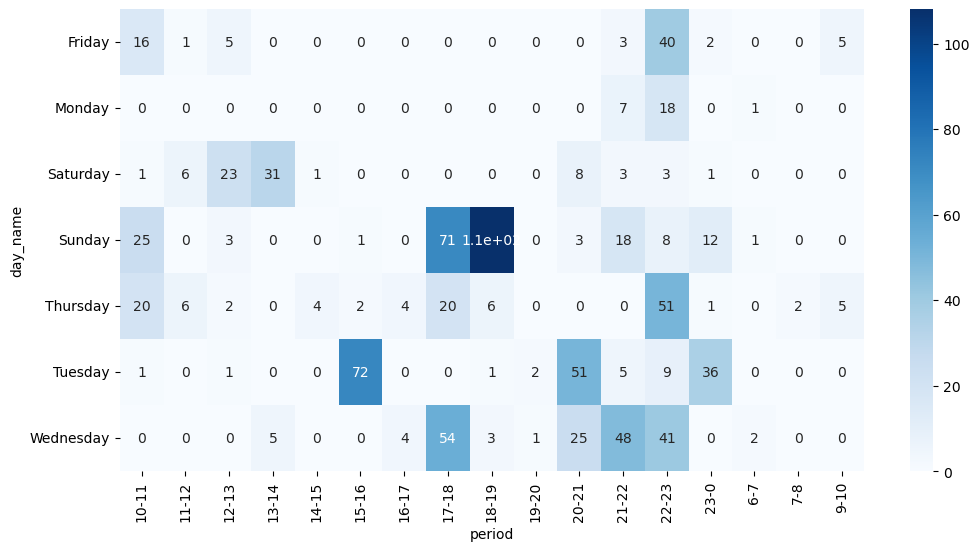

In [67]:
import seaborn as sns 

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()